# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [29]:
accident_df = pd.read_csv('data/AviationData_cleaned.csv')

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [30]:
def get_size(row):
    if row['Total_Passengers'] >= 20:
        return 'large'
    else:
        return 'small'
    
accident_df['Plane_size'] = accident_df.apply(get_size, axis=1)

In [31]:
large_planes_df = accident_df.loc[accident_df['Plane_size'] == 'large']
small_planes_df = accident_df.loc[accident_df['Plane_size'] == 'small']

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [32]:
large_plane_makes = large_planes_df.groupby('Make')['Severe_Injury_Rate'].mean(numeric_only=True).sort_values(ascending=True)

small_plane_makes = small_planes_df.groupby('Make')['Severe_Injury_Rate'].mean(numeric_only=True).sort_values(ascending=True)

In [33]:
large_df = large_plane_makes[:15].to_frame().reset_index()
large_df['Plane_Size'] = 'large'

small_df = small_plane_makes[:15].to_frame().reset_index()
small_df['Plane_Size'] = 'small'

low_injury_df = pd.concat([small_df, large_df])

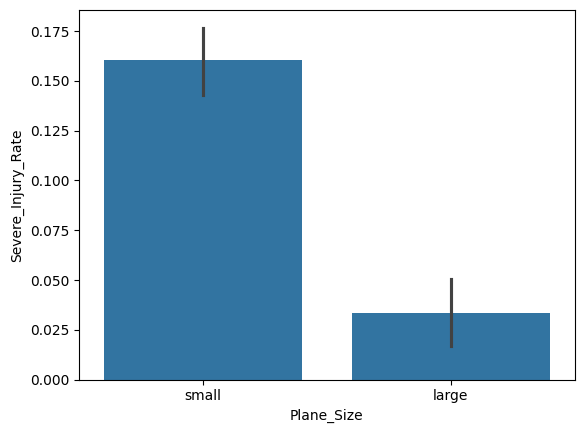

In [34]:
sns.barplot(x='Plane_Size', y='Severe_Injury_Rate', data=low_injury_df);

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [37]:
small_df = small_plane_makes[:10].to_frame().reset_index()

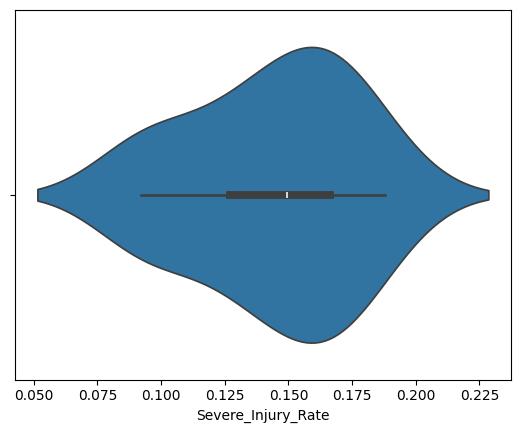

In [39]:
sns.violinplot(data=small_df, x='Severe_Injury_Rate');

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [46]:
large_planes = large_plane_makes.index[:10]
large_df = accident_df.loc[(accident_df['Plane_size'] == 'large') & (accident_df['Make'].isin(large_planes)), ['Make', 'Model', 'Severe_Injury_Rate']]

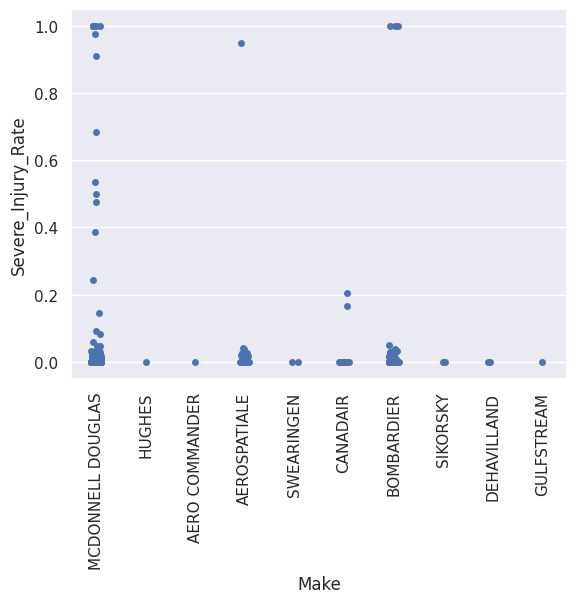

In [51]:
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
sns.stripplot(data=large_df, x='Make', y='Severe_Injury_Rate');

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [61]:
# Make both dataframes. Group by make and count values for amount of aircraft damage, then cast to dataframe
# Pivot the table so that the different aircraft outcomes are columns. Use this new setup to derive the destruction rate per maker
large_plane_destruction = large_planes_df.groupby('Make')['Aircraft.damage'].value_counts().to_frame().reset_index()
large_plane_destruction = large_plane_destruction.pivot(index='Make', columns='Aircraft.damage', values='count').fillna(0)
large_plane_destruction['Total_Crashes'] = large_plane_destruction['Destroyed']+large_plane_destruction['Minor']+large_plane_destruction['Substantial']+large_plane_destruction['Unknown']
large_plane_destruction['Destruction_Rate'] = large_plane_destruction['Destroyed']/large_plane_destruction['Total_Crashes']

small_plane_destruction = small_planes_df.groupby('Make')['Aircraft.damage'].value_counts().to_frame().reset_index()
small_plane_destruction = small_plane_destruction.pivot(index='Make', columns='Aircraft.damage', values='count').fillna(0)
small_plane_destruction['Total_Crashes'] = small_plane_destruction['Destroyed']+small_plane_destruction['Minor']+small_plane_destruction['Substantial']+small_plane_destruction['Unknown']
small_plane_destruction['Destruction_Rate'] = small_plane_destruction['Destroyed']/small_plane_destruction['Total_Crashes']

In [84]:
best_15_large_plane_outcome = large_plane_destruction.sort_values(by=['Destruction_Rate'], ascending=True)[:15]
best_15_large_plane_outcome

Aircraft.damage,Destroyed,Minor,Substantial,Unknown,Total_Crashes,Destruction_Rate
Make,,,,,,
AERO COMMANDER,0.0,0.0,1.0,0.0,1.0,0.000000
CAMERON,0.0,0.0,0.0,1.0,1.0,0.000000
DEHAVILLAND,0.0,1.0,1.0,0.0,2.0,0.000000
SWEARINGEN,0.0,0.0,1.0,1.0,2.0,0.000000
RAYTHEON AIRCRAFT COMPANY,0.0,0.0,1.0,0.0,1.0,0.000000
SIKORSKY,0.0,0.0,1.0,1.0,2.0,0.000000
GULFSTREAM,0.0,0.0,1.0,0.0,1.0,0.000000
HUGHES,0.0,0.0,0.0,1.0,1.0,0.000000
AEROSPATIALE,1.0,8.0,7.0,18.0,34.0,0.029412


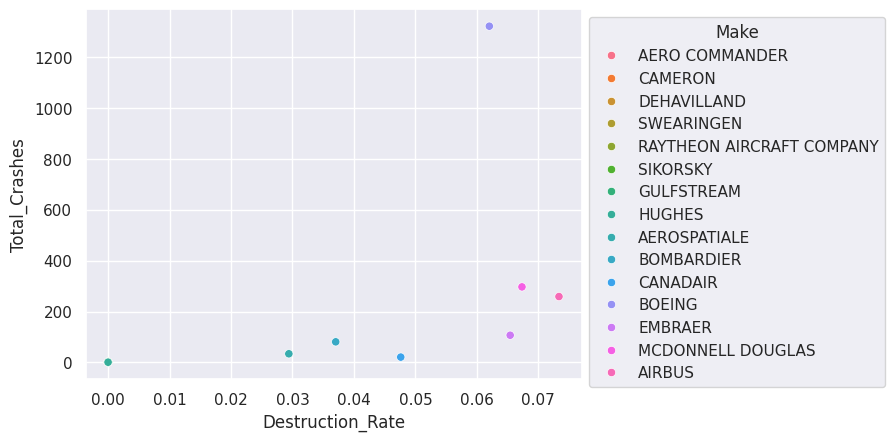

In [70]:
ax = sns.scatterplot(data=best_15_large_plane_outcome, x='Destruction_Rate', y='Total_Crashes', hue='Make')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

In [66]:
best_15_small_plane_outcome = small_plane_destruction.sort_values(by=['Destruction_Rate'], ascending=True)[:15]
best_15_small_plane_outcome

Aircraft.damage,Destroyed,Minor,Substantial,Unknown,Total_Crashes,Destruction_Rate
Make,,,,,,
Unknown,0.0,1.0,3.0,2.0,6.0,0.000000
AIRBUS,6.0,39.0,30.0,116.0,191.0,0.031414
BOMBARDIER,2.0,15.0,16.0,30.0,63.0,0.031746
AMERICAN CHAMPION AIRCRAFT,2.0,0.0,51.0,1.0,54.0,0.037037
AVIAT AIRCRAFT INC,3.0,0.0,73.0,1.0,77.0,0.038961
DEHAVILLAND,4.0,3.0,87.0,5.0,99.0,0.040404
RAVEN,3.0,8.0,31.0,21.0,63.0,0.047619
DIAMOND AIRCRAFT IND INC,4.0,3.0,67.0,0.0,74.0,0.054054
BOEING,74.0,283.0,441.0,448.0,1246.0,0.059390


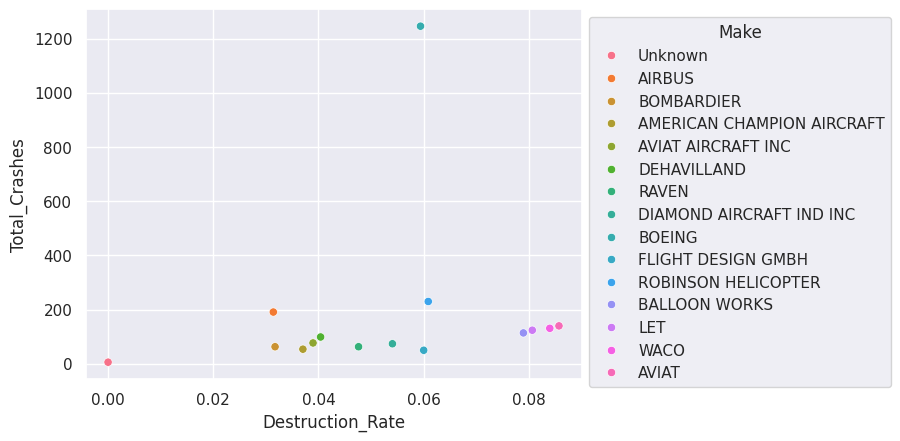

In [71]:
ax = sns.scatterplot(data=best_15_small_plane_outcome, x='Destruction_Rate', y='Total_Crashes', hue='Make')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

##### Response
Unsurprisingly, small aircraft are more dangerous than large. While this data does not tell us the crash rate generally, we can see that the severe injury rate is significantly higher than large aircraft. That said, the rate is still remarkably low (when looking at only the most favorable injury rates, of course). The violin plot shows us a relatively narrow IQR, with most manufacturers clustering around a 16% severe injury rate.

The very clear issue with trying to make conclusions from this data is that we do not have the total number of flights. For example, Boeing's total number of crashes is very high, but Boeing is also the most popular airplane manufacturer in the US. A high rate of crashes is somewhat to be expected, but they managed to keep a low rate of plane destruction. Their severe injury rate is higher, but it would be useful to compare flight volume and the types of paths taken to get a more informative picture of Boeing's safety. It is notable that Boeing and Airbus, the two biggest contenders when it comes to passenger jets, the destruction rate is very close.

In [91]:
# Boeing's severe injury rate
large_plane_makes['BOEING']

np.float64(0.06202541292609707)

In [92]:
# Compared to the 10 lowest severe injury rates
large_plane_makes[:10]

Make
AERO COMMANDER       0.000000
DEHAVILLAND          0.000000
GULFSTREAM           0.000000
HUGHES               0.000000
SIKORSKY             0.000000
SWEARINGEN           0.000000
CANADAIR             0.017705
AEROSPATIALE         0.035119
BOMBARDIER           0.040296
MCDONNELL DOUGLAS    0.043571
Name: Severe_Injury_Rate, dtype: float64

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [114]:
large_plane_inclusion_list = large_planes_df['Make_Model_ID'].value_counts()
large_plane_inclusion_list = large_plane_inclusion_list[large_plane_inclusion_list >= 10]

large_plane_subset = large_planes_df.loc[large_planes_df['Make_Model_ID'].isin(large_plane_inclusion_list.index)]
large_plane_make_means = large_plane_subset.groupby('Make')['Severe_Injury_Rate'].mean(numeric_only=True).to_frame()
large_plane_mmid_means = large_plane_subset.groupby(['Make', 'Model', 'Make_Model_ID'])['Severe_Injury_Rate'].mean(numeric_only=True).to_frame().reset_index()

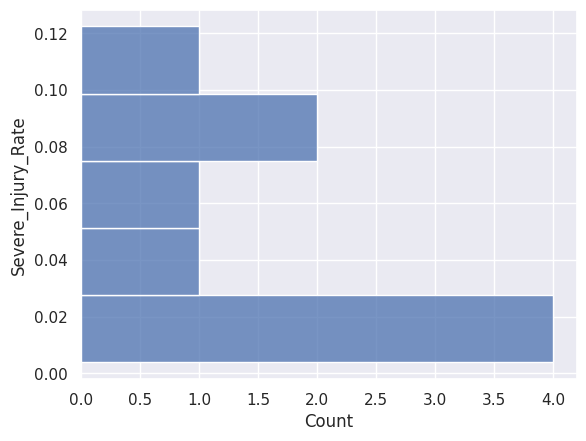

In [123]:
# The distribution of severe injury rates across large plane crashes
sns.histplot(data=large_plane_make_means, y='Severe_Injury_Rate');

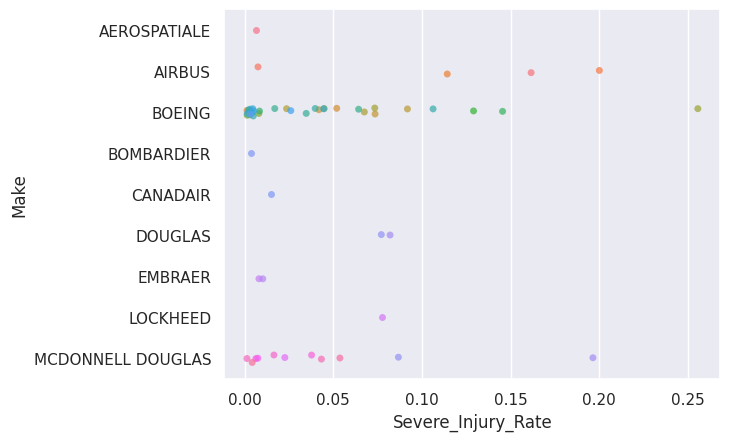

In [124]:
# A strip plot showing models per maker
sns.stripplot(data=large_plane_mmid_means, x='Severe_Injury_Rate', y='Make', hue='Model', legend=False, alpha=0.7);

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [120]:
small_plane_inclusion_list = small_planes_df['Make_Model_ID'].value_counts()
small_plane_inclusion_list = small_plane_inclusion_list[small_plane_inclusion_list >= 10]

small_plane_subset = small_planes_df.loc[small_planes_df['Make_Model_ID'].isin(small_plane_inclusion_list.index)]
small_plane_make_means = small_plane_subset.groupby('Make')['Severe_Injury_Rate'].mean(numeric_only=True).sort_values(ascending=True)[:10].to_frame()
small_plane_mmid_means = small_plane_subset.groupby(['Make', 'Model', 'Make_Model_ID'])['Severe_Injury_Rate'].mean(numeric_only=True).sort_values(ascending=True)[:10].to_frame().reset_index()

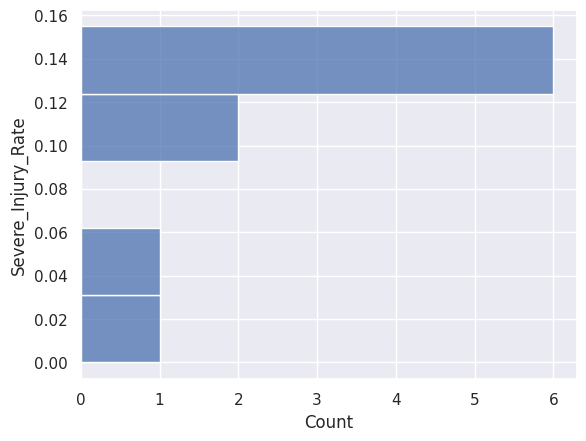

In [125]:
# The distribution of severe injury rates across small plane crashes
sns.histplot(data=small_plane_make_means, y='Severe_Injury_Rate');

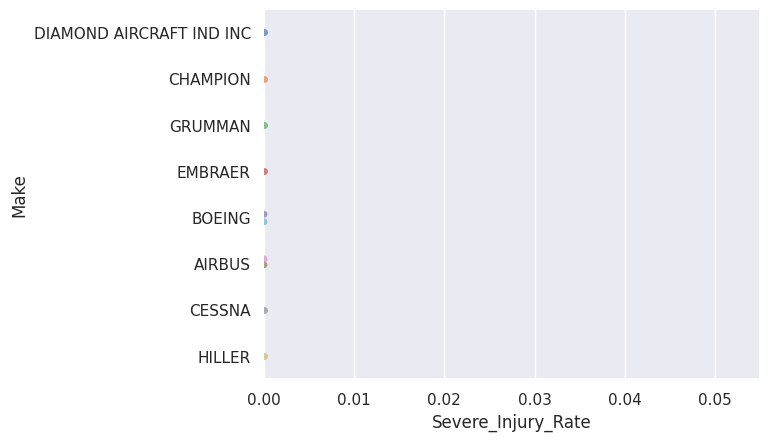

In [131]:
# A strip plot showing models per maker
f, ax = plt.subplots()
small_plot = sns.stripplot(data=small_plane_mmid_means, x='Severe_Injury_Rate', y='Make', hue='Model', legend=False, alpha=0.7, ax=ax);
ax.set_xlim(0)
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

##### Response

Limiting small aircrafts to only the lowest rates of injury is mostly unuseful. These crashes all at or close to 0 injuries, which is only useful to know if the crash rate is high.  Large aircraft crashes also tend to cluster toward low injury rates, suggesting that air travel is quite safe, even in the case of crashes.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

### Phase of flight

In [ ]:
phase_damage_counts = accident_df.groupby('Broad.phase.of.flight')['Aircraft.damage'].value_counts().to_frame().reset_index()
phase_damage_counts = phase_damage_counts.pivot(index='Broad.phase.of.flight', columns='Aircraft.damage', values='count')
phase_damage_counts['Total_damaged'] = phase_damage_counts['Destroyed'] + phase_damage_counts['Minor'] + phase_damage_counts['Substantial'] + phase_damage_counts['Unknown']
phase_damage_counts.sort_values(by=['Total_damaged'], ascending=False)

Aircraft.damage,Destroyed,Minor,Substantial,Unknown,Total_damaged
Broad.phase.of.flight,,,,,
Unknown,3069,902,15222,1592,20785
Landing,484,231,10491,134,11340
Takeoff,1795,196,6406,109,8506
Cruise,2330,169,4576,259,7334
Maneuvering,2274,33,3131,31,5469
Approach,1270,116,3084,88,4558
Climb,559,80,751,93,1483
Taxi,37,179,1158,81,1455
Descent,397,49,845,125,1416


In [168]:
phase_damage_counts = phase_damage_counts.rename_axis(None, axis=1).reset_index()
phase_damage_chart = pd.melt(phase_damage_counts, var_name='damage', id_vars=['Broad.phase.of.flight'], value_name='count', value_vars=['Destroyed', 'Minor', 'Substantial', 'Unknown'])

From this table, and excluding unknown phases, we can see that landing and then takeoff are indeed the phases with the highest rate of crashes. However, landing seems to have a lower rate of crafts being destroyed compared to other phases.

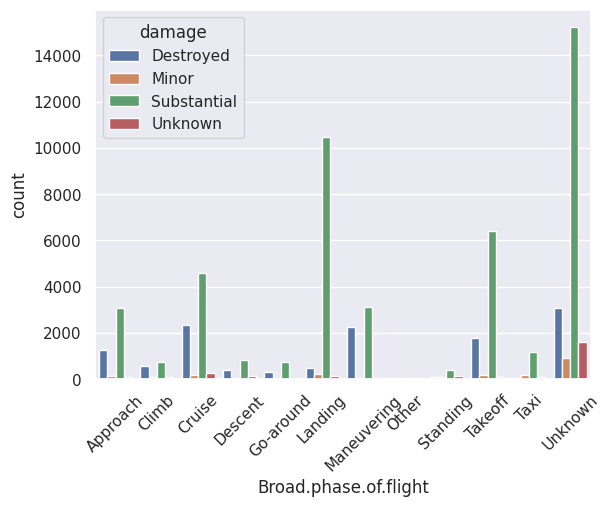

In [169]:
phases_plot = sns.barplot(data=phase_damage_chart, x='Broad.phase.of.flight', y='count', hue='damage')
plt.xticks(rotation=45)
plt.show();

Looking at the bar chart, substantial damage is clearly the most common type of crash, followed by a destroyed craft.

### Number of engines

Nowadays, regulating aircraft includes always being able to fly on one engine. This accounts for engines going out on large craft. This would suggest single-engine craft crash rates would be higher.

In [173]:
engine_number_counts = accident_df.groupby('Number.of.Engines')['Plane_size'].value_counts().to_frame().reset_index()
engine_number_counts = engine_number_counts.pivot(index='Number.of.Engines', columns='Plane_size', values='count')
engine_number_counts = engine_number_counts.fillna({'small': 0, 'large': 0})
engine_number_counts['Total_crashes'] = engine_number_counts['small'] + engine_number_counts['large']
engine_number_counts.sort_values(by='Number.of.Engines')

Plane_size,large,small,Total_crashes
Number.of.Engines,,,
0.0,11.0,679.0,690.0
1.0,10.0,49293.0,49303.0
2.0,1434.0,7226.0,8660.0
3.0,269.0,98.0,367.0
4.0,139.0,208.0,347.0
8.0,0.0,1.0,1.0


Unsurprisingly, single-engine small aircraft make up the vast majority of aircraft crashes. Additionally, the 8-engine craft is certainly not a small aicraft. 8-engine crafts are the likes of the B-52. This shows a weakness in our method of differentiating small vs large aircraft rather than using a domain-knowledge based approach. Fortunately, it only makes up one value, which can show how these best-guess estimates are *usually* good enough.

In [174]:
engine_number_counts = engine_number_counts.rename_axis(None, axis=1).reset_index()
engine_number_chart = pd.melt(engine_number_counts, var_name='size', id_vars=['Number.of.Engines'], value_name='count', value_vars=['large', 'small'])

In [177]:
engine_number_chart

,Number.of.Engines,size,count
0,0.0,large,11.0
1,1.0,large,10.0
2,2.0,large,1434.0
3,3.0,large,269.0
4,4.0,large,139.0
5,8.0,large,0.0
6,0.0,small,679.0
7,1.0,small,49293.0
8,2.0,small,7226.0
9,3.0,small,98.0


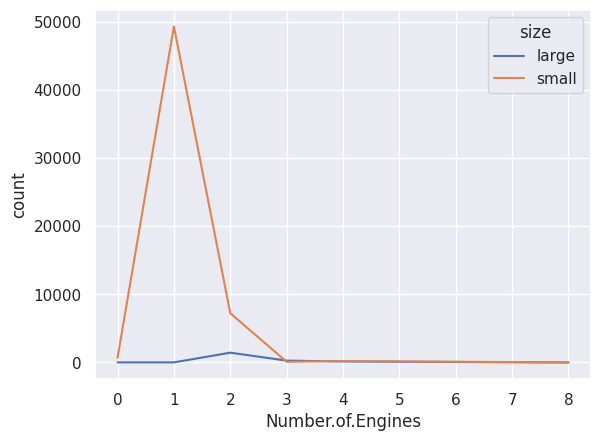

In [182]:
engines_plot = sns.lineplot(data=engine_number_chart, x='Number.of.Engines', y='count', hue='size')
plt.xlabel='Number of Engines'
plt.ylabel = 'Number of crashes'
plt.title = 'Crashes per engine count for small and large planes'
plt.show();

An insurer might want to give careful consideration when working with single-enginge crafts. Their crash rate is much higher, however the passenger rate is also likely to be smaller. Future directions to analyze would be to count the aggregated number of injuries based on engine count. Do single-engine crafts have injuries often enough to outpace the number of passengers hurt in larger, multi-engine plane crashes?